## Assignment 1a: Machine Learning Methods

### Md Tauhidul Islam a1895813

#### How can we use data analytics to predict energy usage for this house?

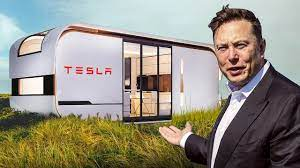

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv("energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### 2. Analyse and visualise the data
We can identify data depedencies by correlation analysis. Will use heatmap to visualise the data dependencies. 

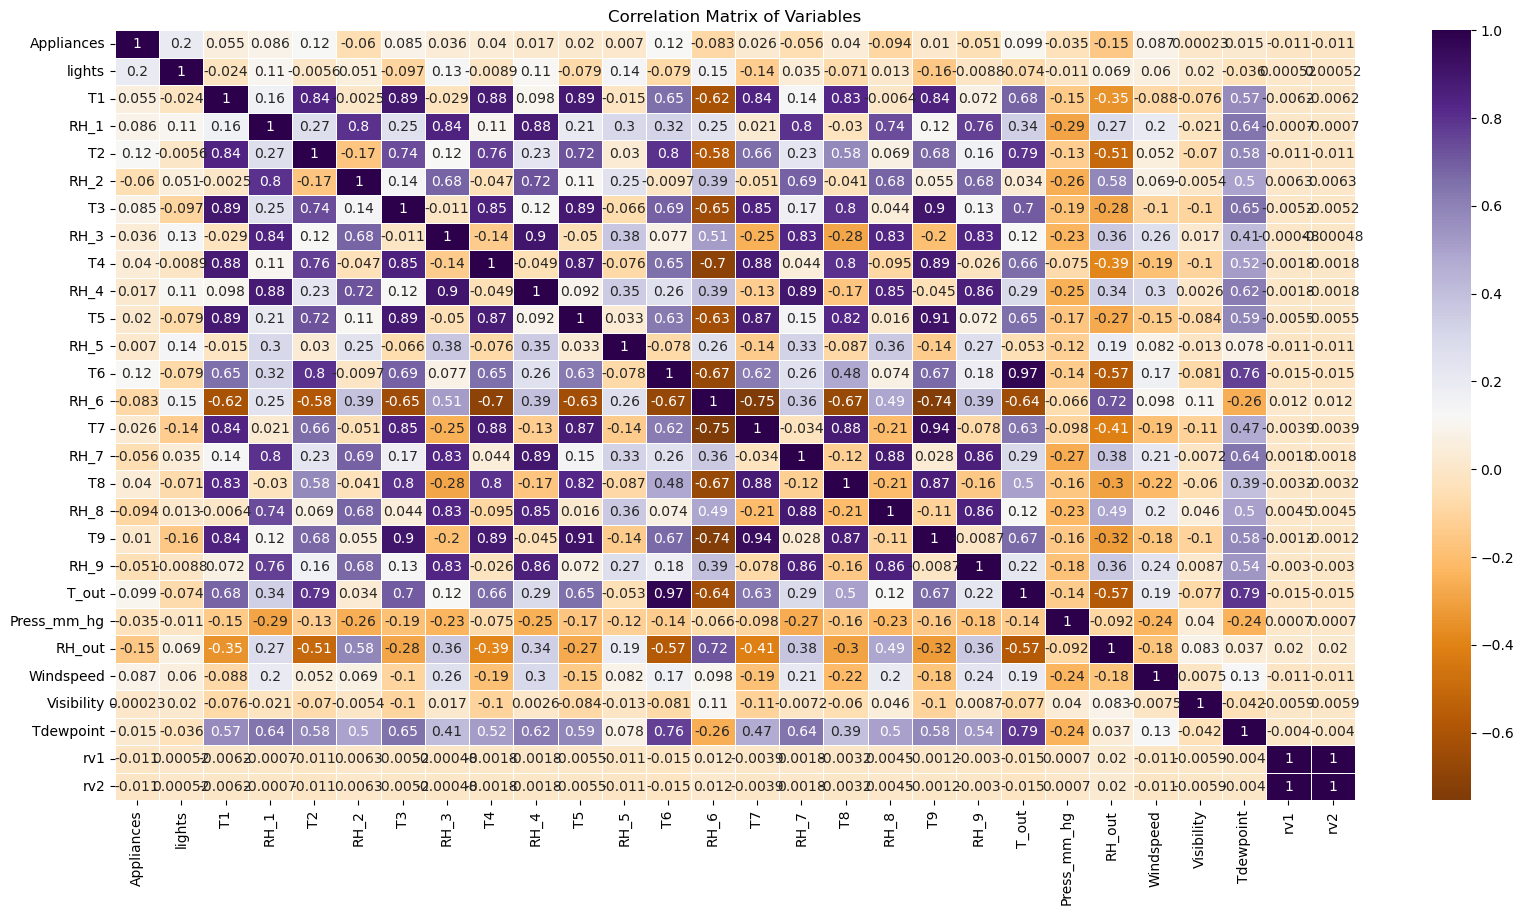

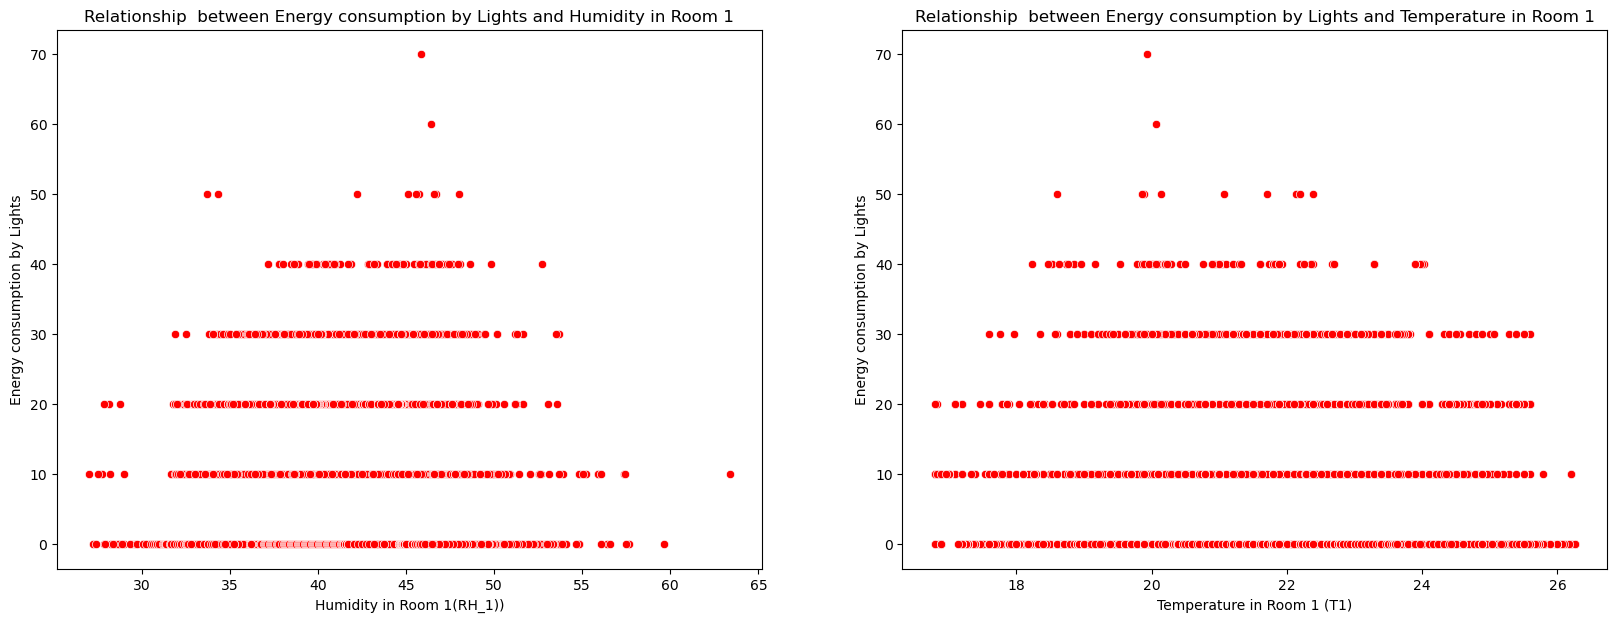

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the correlation among variables to identify dependencies
corr_matrix = df.corr(numeric_only=True) # with "numeric_only=True" removing the warning I encountered for handling handling non-numeric column

# Visualizing the data dependencies using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True,  cmap='PuOr', linewidths=0.5) # Reference: https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.title('Correlation Matrix of Variables')
plt.show()

'''First, Let's  plot energy consumtion by lights vs T1 and RH_1 for visualisation purpose'''

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.scatterplot(x=df['RH_1'], y=df['lights'], color="red", ax=ax[0])
ax[0].set_title('Relationship  between Energy consumption by Lights and Humidity in Room 1')
ax[0].set_xlabel('Humidity in Room 1(RH_1))')
ax[0].set_ylabel('Energy consumption by Lights')


sns.scatterplot(x=df['T1'], y=df['lights'], color="red", ax=ax[1])
ax[1].set_title('Relationship  between Energy consumption by Lights and Temperature in Room 1')
ax[1].set_xlabel('Temperature in Room 1 (T1)')
ax[1].set_ylabel('Energy consumption by Lights')

plt.show()


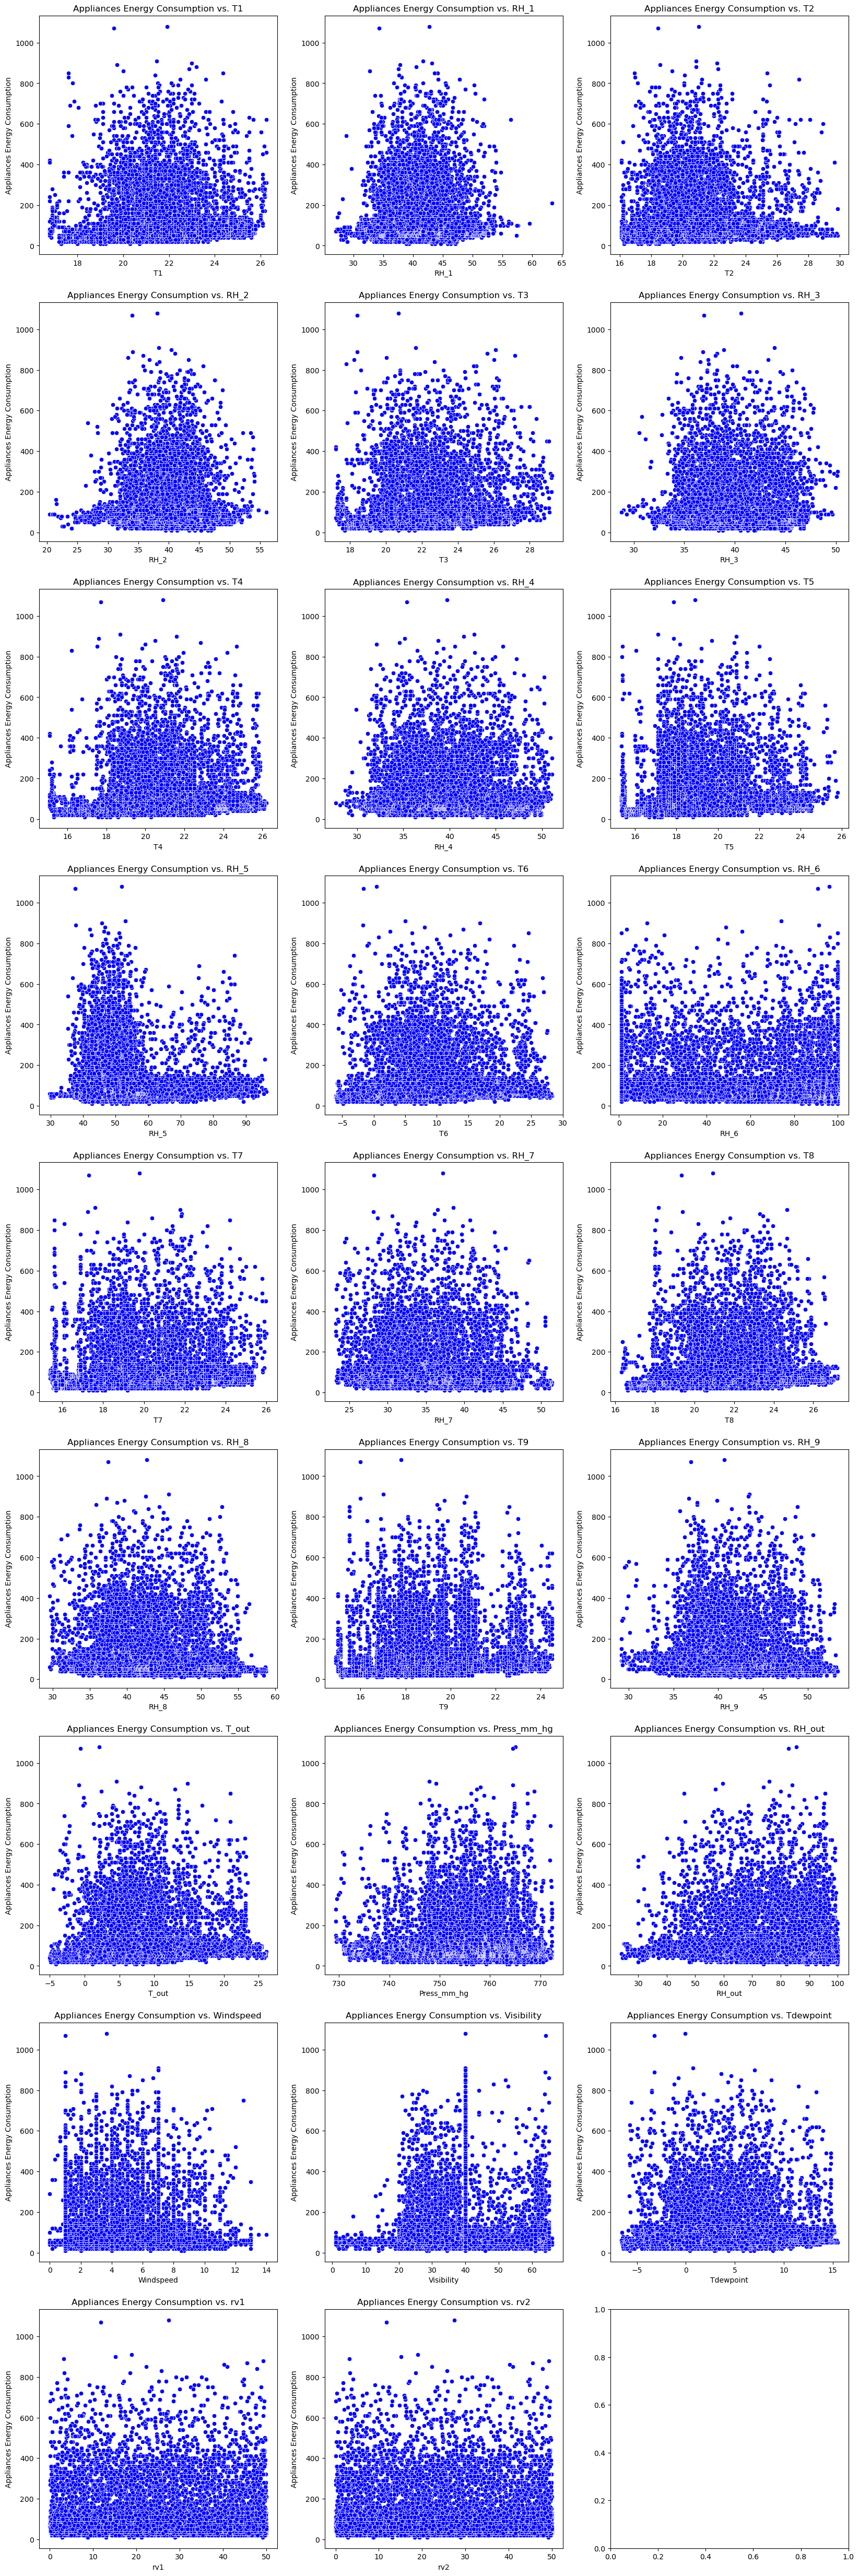

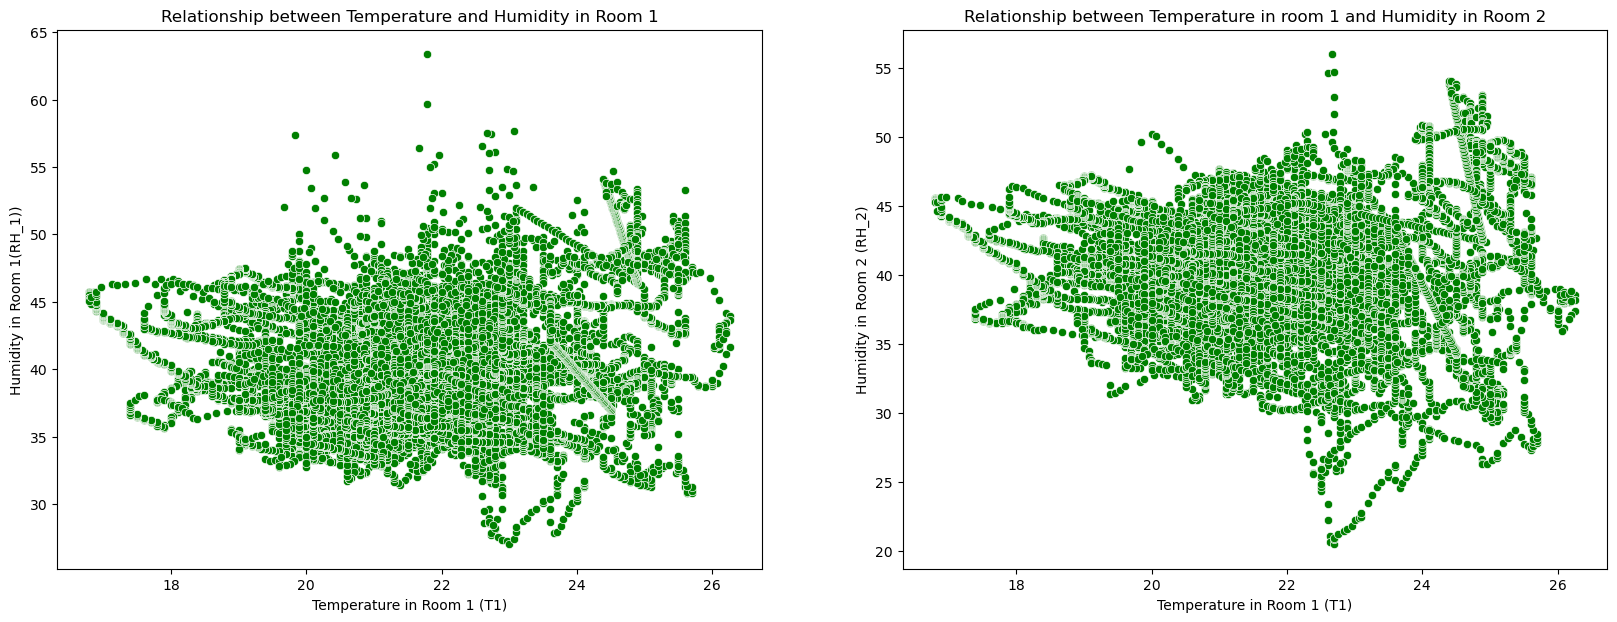

In [11]:
''' From the above visualisation I found that light has very low correlation with the environmental variable
Therefore, Let's consider Appliances as our target variable for prediction and plot energy consumption by appliance
vs other variables'''

features_to_plot = df.columns.drop(['Appliances', 'date', 'lights']) # Excluding target variable, 'date' and 'lights' column that we do not need to plot

# Ploting in three columns to save for a satisfactory presentation
n_features = len(features_to_plot)
n_cols = 3 
n_rows = (n_features + n_cols - 1) // n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 7 * n_rows)) #Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

for i, feature in enumerate(features_to_plot):
    row, col = divmod(i, n_cols)
    sns.scatterplot(x=df[feature], y=df['Appliances'], ax=ax[row, col], color="blue") #Reference: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
    ax[row, col].set_title(f'Appliances Energy Consumption vs. {feature}')
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_ylabel('Appliances Energy Consumption')

'''Again, let's plot Temperature in room1 vs Humidity in room1 and room2 to see the 
dependency in between these environmental variables (Only ploting two plots for visualisation)'''

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.scatterplot(x=df['T1'], y=df['RH_1'], color="green", ax=ax[0])

ax[0].set_title('Relationship between Temperature and Humidity in Room 1')
ax[0].set_xlabel('Temperature in Room 1 (T1)')
ax[0].set_ylabel('Humidity in Room 1(RH_1))')

sns.scatterplot(x=df['T1'], y=df['RH_2'], color="green", ax=ax[1])
ax[1].set_title('Relationship between Temperature in room 1 and Humidity in Room 2')
ax[1].set_xlabel('Temperature in Room 1 (T1)')
ax[1].set_ylabel('Humidity in Room 2 (RH_2)')

plt.show()

### Explaining Data Dependencies 
We can visualise the relationships among variables including temperatures, humidity in different rooms, and energy use by appliances and lights from the above heatmap and scatterplots. 

#### Key observations:

* A strong correlations among the environmental variables can be observed. This means the environmental condition in one room can be predicted by the condition of another room.

* The energy use of appliances shows some level of correlation with environmental variables. There are some linear relationship as well as some non-linear dependencies.

* The energy consumption of lights show a relatively lower correlations with environmental variables.

* The random variables (rv1 and rv2) do not show significant correlations with other variables. We can consider them as noise.

#### The following approachs can be recommended for data preprocessing and prediction modeling:

### Data Preprocessing
* As the "date" column has no impact in our calculation of energy consumption, we we'll drop the date column. In addition, we'll drop 'rv1' and 'rv2' for their negligible impact.
* We need to normalise data to equalise the contribution of each feature to the model using StandardScaler
* Missing values need to be addressed
* Techniques like PCA can be applied to reduce dimension to simplify the model.

### Prediction Models
* Linear Regression: This model is selected as a baseline model to capture underlying linear relationship between the features and target vairable.
* Random Forest Regressor: This model is selected for its ability to handle complex datasets and nonlinear relationships among variables.
* Gradient Boosting Regressor: This model is selected because of its predictive accuracy


### 3. Pre-process the data

In [12]:
# We will start by processing the data based on our outlined strategy. Steps involves droping 'date', 'rv1', 'rv2' column and scaling.
new_df = df.drop(['date', 'rv1', 'rv2'], axis = 1)

# Standardising the dataset. Here, we'll use StandardScaler.
from sklearn.preprocessing import StandardScaler # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = StandardScaler()
new_df_scaled = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)
new_df_scaled.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,...,-1.957509,1.141572,-1.217324,0.958136,-0.152788,-2.976328,0.82208,1.207694,2.091596,0.366854
1,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,...,-1.957509,1.134554,-1.200778,0.965363,-0.175352,-2.962813,0.82208,1.071703,1.766584,0.343017
2,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,...,-1.957509,1.109032,-1.233869,0.950910,-0.196035,-2.949298,0.82208,0.935713,1.441572,0.319180
3,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,...,-2.008631,1.082233,-1.233869,0.926821,-0.218599,-2.935783,0.82208,0.799723,1.116559,0.295343
4,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,...,-2.008631,1.082233,-1.233869,0.926821,-0.241162,-2.922268,0.82208,0.663733,0.791547,0.271506


In [13]:
#Now we'll check missing value
missing_values = new_df_scaled.isnull().sum()
print(missing_values)

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64


#### Findings: We do not have any missing value.

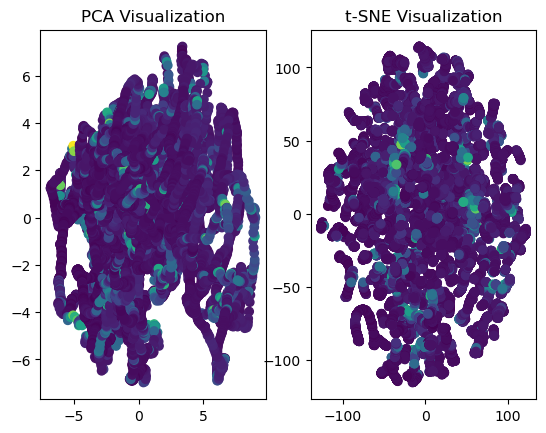

In [17]:
#Now we'll conduct dimension reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

y = new_df_scaled['Appliances'] # The target variable

# Applying PCA for dimensionality reduction
# Let's choose to keep components that explain 95% of the variance
pca = PCA(n_components=0.95)
new_df_pca = pca.fit_transform(new_df_scaled)

# Applying t-SNE for further visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
new_df_tsne = tsne.fit_transform(new_df_pca)

plt.subplot(1, 2, 1)
plt.scatter(new_df_pca[:, 0], new_df_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Visualization')

# Plot t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(new_df_tsne[:, 0], new_df_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization')

plt.show()

### 4. Implement, train and test prediction models

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

new_df_pca_df = pd.DataFrame(new_df_pca) #Dataframe after dimension reduction

# Splitting the dataset and the target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_df_pca_df, y, test_size=0.3)

# Initialize the models
lr_model = LinearRegression() #Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
rf_model = RandomForestRegressor() #Reference https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
gb_model = GradientBoostingRegressor() #Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

# Fit the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Evaluate the models
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

# Performance Results
print("Linear Regression: coefficient of determination R-Squared: "+str(r2_score(y_test, lr_predictions)))
print("Random Forest: coefficient of determination R-Squared: "+str(r2_score(y_test, rf_predictions)))
print("Gradient Boosting: coefficient of determination R-Squared: "+str(r2_score(y_test, gb_predictions)))
print()
print(f'Linear Regression Mean Squared Error: {lr_mse}\nRandom Forest Mean Squared Error: {rf_mse}\nGradient Boosting Regressor Mean Squared Error: {gb_mse}')


Linear Regression: coefficient of determination R-Squared: 0.9992411992070176
Random Forest: coefficient of determination R-Squared: 0.9823370176583635
Gradient Boosting: coefficient of determination R-Squared: 0.9638358022066513

Linear Regression Mean Squared Error: 0.000717908786819344
Random Forest Mean Squared Error: 0.016711118836151784
Gradient Boosting Regressor Mean Squared Error: 0.03421529814442159


### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

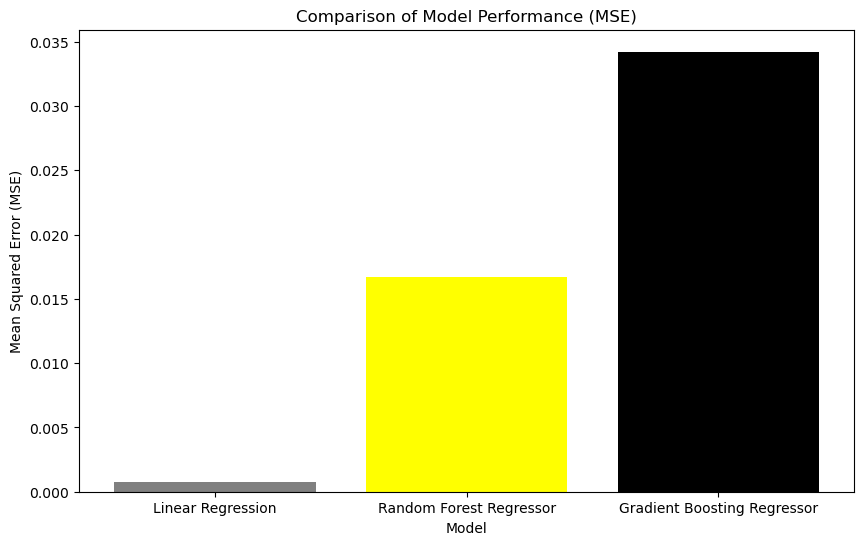

,Model,MSE
0,Linear Regression,0.000718
1,Random Forest Regressor,0.016711
2,Gradient Boosting Regressor,0.034215


In [23]:
model_names = ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor']
model_mse = [lr_mse, rf_mse, gb_mse]

# Creating a bar chart for visual comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_mse, color=['Gray','Yellow', 'black'])

plt.title('Comparison of Model Performance (MSE)')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

# Presenting the results in a table format
import pandas as pd

df_table = pd.DataFrame({
    'Model': model_names,
    'MSE': model_mse
})

df_table


## Comparing results from all candidate models
The comparison between the Ridge Regression and Random Forest Regressor models is summarized in both a bar chart and a table, showing their performance based on the Mean Squared Error (MSE) metric.

#### Result Summary:

* Linear Regression: MSE = 0.000718
* Random Forest Regressor: MSE = 0.016711
* Gradient Boosting Regressor: MSE = 0.034215

#### Model Selection
Linear Regression outperforms the Random Forest and Gradient Boosting Regression model as it shows a lower MSE which indicates that Linear Regression model's predictions are closer to the actual energy consumption values.


### 6. Reflect on what you have learned by completing this assignment and how to improve the models

I have learned how to identify data dependencies, use suitable processing and prediction models. I also made extensive research and practice to complete this project using built in python libraries which improved my coding skills. I am new to all the regression techniques. Therefore, I need to study more on how to improve models. 

### 7. References
https://matplotlib.org/stable/users/explain/colors/colormaps.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/modules/impute.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html